# Libraries

In [1]:
# Load librarie
import pandas as pd
import numpy as np

# Reading and adding label


In [2]:
# Load fake news dataset
fake = pd.read_csv("Fake.csv")
# Load true news dataset
true = pd.read_csv("True.csv")
# Add label
fake["Label"] = 1
true["Label"] = 0
fake

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


# Combining 

In [3]:
# Combining both into new dataframe "news_dataset"
frames = [fake, true]
news_dataset= pd.concat(frames)
news_dataset

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


# Shuffling data

In [4]:
news_dataset = news_dataset .sample(frac = 1)
news_dataset.head()

,title,text,subject,date,Label
726,GOP Senator Has Had ENOUGH: Firing Mueller Co...,Senator Lindsey Graham (R-SC) has never been a...,News,"July 27, 2017",1
12606,VERY POWERFUL! Black Trump Supporters Give MSN...,MUST WATCH: MSNBC interviews black women voter...,politics,"Oct 27, 2016",1
18273,British PM May is not considering resigning af...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"October 5, 2017",0
6760,McCain says 'no information' Russia sought to ...,WASHINGTON (Reuters) - There is “no informatio...,politicsNews,"December 12, 2016",0
6791,Romney niece McDaniel is favorite to head Repu...,"GRAND RAPIDS, Mich. (Reuters) - Michigan Repub...",politicsNews,"December 9, 2016",0


# Pre-Processing

In [5]:
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [6]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
news_dataset= news_dataset.drop(['title','subject','date'],axis=1)


# Stemming text

#### Stemming is the process of reducing a word to its Root word 
#### example :
##### programmation : programme
##### eating : eat 
##### books : book

In [8]:
port_stem = PorterStemmer()

In [9]:
def stemming(content):
    strmmed_content = re.sub('[^a-zA-Z]',' ',content)
    strmmed_content = strmmed_content.lower() # Characters are lowercase
    strmmed_content = strmmed_content.split() # Splits a string into an ordered list of substrings
    strmmed_content = [port_stem.stem(word) for word in  strmmed_content   if not word in stopwords.words('english')]
    strmmed_content  = ' '.join( strmmed_content )
    return  strmmed_content

In [10]:
news_dataset['text'] = news_dataset['text'].apply(stemming)

In [11]:
print(news_dataset['text'])

726      senat lindsey graham r sc never fan donald tru...
12606    must watch msnbc interview black women voter d...
18273    london reuter british prime minist theresa may...
6760     washington reuter inform russian hack american...
6791     grand rapid mich reuter michigan republican pa...
                               ...                        
5293     washington reuter presid donald trump said thu...
11609    toler trust human bomb islam terror allahu akb...
10383    low blow polit hack angela rye refus say presi...
18114    kati couric career pretti much free fall sinc ...
19429    brussel reuter spain eu partner fear mount cri...
Name: text, Length: 44898, dtype: object


# Defining dependent and independent variables


In [12]:
X = news_dataset['text'].values
y = news_dataset['Label'].values

In [13]:
print(y)

[1 1 0 ... 1 1 0]


# Data Transformation  with HashingVectorizer()

###          -   converting the textuel data to numerical data

In [14]:
from sklearn.feature_extraction.text import HashingVectorizer
import numpy as np
X2 = np.array(X)
vectorizer = HashingVectorizer(n_features=1500)
vector2 = vectorizer.transform(X2)
print(vector2.shape)
print(vector2.toarray())
#to dataframe
dft=pd.DataFrame.sparse.from_spmatrix(vector2)

(44898, 1500)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.05292561  0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


# Splitting Training and Testing


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dft, y, test_size = 0.2, random_state=2)

# Best Model in Machine Learning 

## XGBOOST

In [15]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer()
x = vectorizer.transform(X)
print(x.shape)
print(x.toarray())

(44898, 1048576)


MemoryError: Unable to allocate 351. GiB for an array with shape (44898, 1048576) and data type float64

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=2)

In [19]:
from xgboost import XGBClassifier

In [20]:
xgb = XGBClassifier()
tfidf = xgb.fit(X_train,Y_train)

C:\Users\ASUS1\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:34:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [21]:
from sklearn.metrics import accuracy_score 
tfidf_val_predict = tfidf.predict( X_test)
print('accuracy =',accuracy_score(Y_test, tfidf_val_predict))

accuracy = 0.9983296213808464


In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Precision = ', precision_score(tfidf_val_predict, Y_test))
print('Recall = ', recall_score(tfidf_val_predict, Y_test))
print('f1_score = ', f1_score(tfidf_val_predict, Y_test))

Precision =  0.997870528109029
Recall =  0.998934129183543
f1_score =  0.9984020453819111


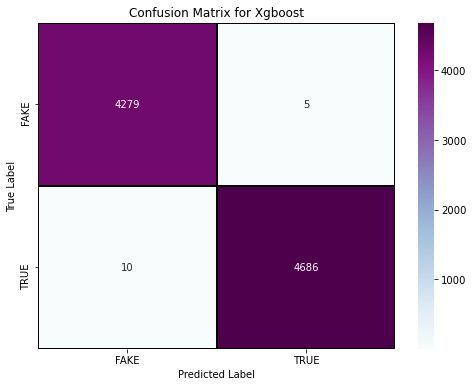

In [24]:
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, tfidf_val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "BuPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Xgboost')
plt.savefig('confision matrix for XGBoost',dpi=300)

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob = xgb.predict_proba(X_test)

In [26]:
fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
# auc scores
auc_score = roc_auc_score(Y_test, pred_prob[:,1])
print(auc_score)

0.9999347339730895


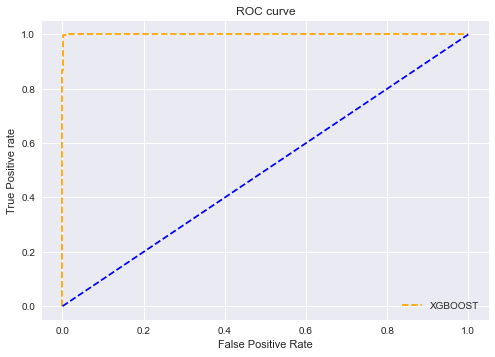

In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='XGBOOST')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc of XGBOOST ',dpi=300)
plt.show();

# Best Deep Learning Models

## MLP

In [42]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(300,190,60),
                        max_iter = 30,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(300, 190, 60), max_iter=30)

In [43]:
y_pred= mlp_clf.predict(X_test)

print('Accuracy: {:.7f}'.format(accuracy_score(Y_test, y_pred)))

Accuracy: 0.9863029


In [44]:
print('Precision = ', precision_score(y_pred, Y_test))
print('Recall = ', recall_score(y_pred, Y_test))
print('f1_score = ', f1_score(y_pred, Y_test))

Precision =  0.987862010221465
Recall =  0.9859723698193411
f1_score =  0.9869162855015424


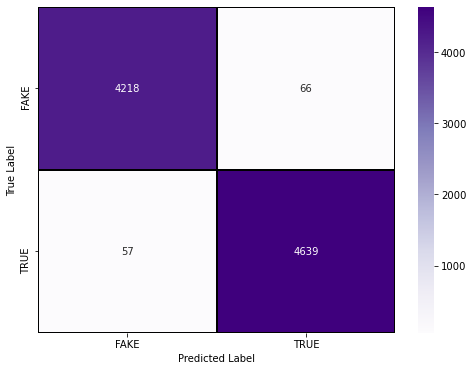

In [45]:
cm = confusion_matrix(Y_test, y_pred)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Purples", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.savefig('confusion matrix for MLP',dpi=300)

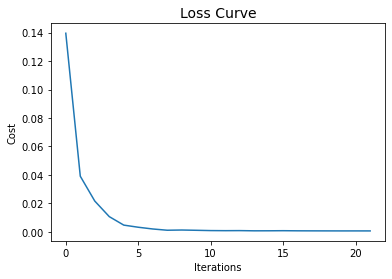

In [46]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Tensorflow

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [29]:
n_features = X_train.shape[1]
n_features 
X_train.shape

(35918, 1500)

In [34]:
#Building Model
model = Sequential()
model.add(Dense(150, activation='tanh', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(100, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(50, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
#Compile The Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
#Fit The Model
model.fit(X_train, Y_train, epochs=60, batch_size=32,verbose=1)

Epoch 1/60
1123/1123 [==============================] - 4s 3ms/step - loss: 0.0853 - accuracy: 0.9718
Epoch 2/60
1123/1123 [==============================] - 4s 3ms/step - loss: 0.0464 - accuracy: 0.9859
Epoch 3/60
1123/1123 [==============================] - 4s 3ms/step - loss: 0.0385 - accuracy: 0.9886
Epoch 4/60
1123/1123 [==============================] - 4s 3ms/step - loss: 0.0311 - accuracy: 0.9903
Epoch 5/60
1123/1123 [==============================] - 5s 5ms/step - loss: 0.0236 - accuracy: 0.9927
Epoch 6/60
1123/1123 [==============================] - 4s 4ms/step - loss: 0.0209 - accuracy: 0.9933
Epoch 7/60
1123/1123 [==============================] - 4s 3ms/step - loss: 0.0165 - accuracy: 0.9948
Epoch 8/60
1123/1123 [==============================] - 5s 4ms/step - loss: 0.0114 - accuracy: 0.9969
Epoch 9/60
1123/1123 [==============================] - 4s 4ms/step - loss: 0.0114 - accuracy: 0.9964
Epoch 10/60
1123/1123 [==============================] - 4s 4ms/step - loss: 0.011

In [37]:
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.7f' % acc)

Test Accuracy: 0.9877505


In [38]:
y_pred=model.predict(X_test)

binary_predictions =[]

for i in y_pred:
    if i >=0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [39]:
# Importing metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Model accuracy is ",accuracy_score(binary_predictions,Y_test)*100)
print("Model precision is ",precision_score(binary_predictions,Y_test)*100)
print("Model recall is ",recall_score(binary_predictions,Y_test)*100)
print("Model f1_score is ",f1_score(binary_predictions,Y_test)*100)

Model accuracy is  98.7750556792873
Model precision is  99.21209540034071
Model recall is  98.45731191885038
Model f1_score is  98.83326262197708


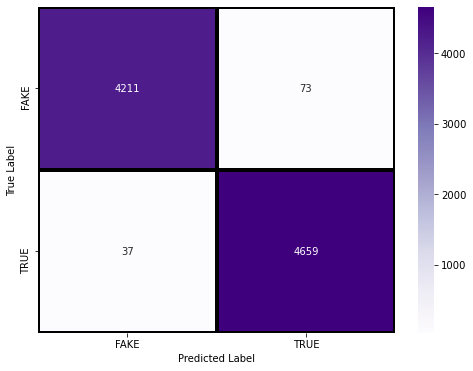

In [40]:
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, binary_predictions)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Purples", linecolor = 'black' , linewidth = 3 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.title('Confusion Matrix for tensorflow')
plt.savefig('confusion matrix for tensorflow 5',dpi=300)

## Pytorch

In [61]:
import torch
import torch.nn as nn

In [62]:
vectorizer_text = HashingVectorizer(stop_words="english",n_features=8000)
text_matrix = vectorizer_text.fit_transform(X).toarray()

print("Finished")

Finished


In [63]:
print(news_dataset.shape)

print(text_matrix.shape)

# Creating Y
y = news_dataset.Label

# Creating X
x=text_matrix

(44898, 2)
(44898, 8000)


In [64]:

from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35918, 8000)
(8980, 8000)
(35918,)
(8980,)


In [66]:
import torch.nn as nn
class ANN(nn.Module):
    
    def __init__(self):
        
        super(ANN,self).__init__() # Inhertiting
        
        self.linear1 = nn.Linear(8000,6000) # IN 8000 OUT 6000
        self.relu1 = nn.ReLU() # Actfunc 1
        
        self.linear2 = nn.Linear(6000,3000) # IN 6000 OUT 3000
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(3000,1000) # IN 3000 OUT 1000
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(1000,100) # IN 1000 OUT 100
        self.relu4 = nn.ReLU()
        
        self.linear5 = nn.Linear(100,20) # IN 100 OUT 20
        self.relu5 = nn.ReLU()
        
        self.linear6 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT 
        
    
    def forward(self,x):
        
        out = self.linear1(x) # Input Layer 
        out = self.relu1(out)
        
        out = self.linear2(out) # Hidden Layer 1 
        out = self.relu2(out)
        
        out = self.linear3(out) # Hidden Layer 2 
        out = self.relu3(out)
        
        out = self.linear4(out) # Hidden Layer 3 
        out = self.relu4(out)
        
        out = self.linear5(out) # Hidden Layer 4 
        out = self.relu5(out)
        
        out = self.linear6(out) # Output Layer
        
        return out
    

model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
error = nn.CrossEntropyLoss() #binary_crossentropy


In [67]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

EPOCHS = 30

for epoch in range(EPOCHS):
    
    # Clearing gradients
    optimizer.zero_grad()
    
    # Forward Propagation
    outs = model(X_train)
    
    # Computing Loss
    loss = error(outs,Y_train)
    
    # Backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Printing loss
    print(f"Loss after iteration {epoch} is {loss}")

Loss after iteration 0 is 0.6922810673713684
Loss after iteration 1 is 0.808465301990509
Loss after iteration 2 is 0.6925058960914612
Loss after iteration 3 is 4.394179821014404
Loss after iteration 4 is 0.6862664222717285
Loss after iteration 5 is 0.6838672757148743
Loss after iteration 6 is 0.6723612546920776
Loss after iteration 7 is 0.662721574306488
Loss after iteration 8 is 0.603973925113678
Loss after iteration 9 is 0.5048074722290039
Loss after iteration 10 is 0.5032059550285339
Loss after iteration 11 is 0.3383939266204834
Loss after iteration 12 is 0.3179763853549957
Loss after iteration 13 is 0.15319520235061646
Loss after iteration 14 is 0.10418346524238586
Loss after iteration 15 is 0.08064798265695572
Loss after iteration 16 is 0.07270855456590652
Loss after iteration 17 is 0.042916711419820786
Loss after iteration 18 is 0.034030117094516754
Loss after iteration 19 is 0.021974744275212288
Loss after iteration 20 is 0.020033808425068855
Loss after iteration 21 is 0.0091280

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Prediction
y_head = model(X_test)
print(y_head[0])

# Converting Prediction into labels
y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print(" accuracy = ",accuracy_score(y_pred,Y_test)*100)
print(" precision = ",precision_score(y_pred,Y_test)*100)
print(" recall = ",recall_score(y_pred,Y_test)*100)
print(" f1_score = ",f1_score(y_pred,Y_test)*100)

tensor([ 4.8300, 23.7371], grad_fn=<SelectBackward0>)
tensor(1)
 accuracy =  98.44097995545657
 precision =  98.42419080068143
 recall =  98.59215017064847
 f1_score =  98.5080988917306


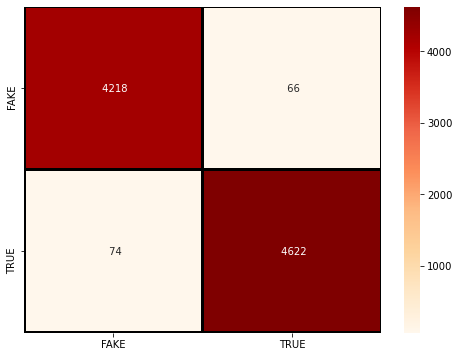

In [69]:
confusion_matrix = confusion_matrix(y_pred=y_pred,y_true=Y_test) #y_true=y_test

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix,cmap= "OrRd", linecolor = 'black' ,annot=True,fmt=" ",linewidths=2,xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.show()